In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [52]:
#Scaleres
from sklearn.preprocessing import RobustScaler

#train
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score 

#Imputer
from sklearn.impute import SimpleImputer

#PipeLine
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

#Model
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

#Grid Search
from sklearn.model_selection import GridSearchCV

In [4]:
data = pd.read_csv("/home/ecapi/code/sebvey/water_pollution/raw_data/2011_2021_caluire_phys_v0.csv")

# Convert the date column to a datatime object

In [5]:
data.DatePrel = pd.to_datetime(data.DatePrel)

In [6]:
data.dtypes

DatePrel    datetime64[ns]
1303               float64
1311               float64
1301               float64
1302               float64
1312               float64
1841               float64
1295               float64
1335               float64
1314               float64
1433               float64
1313               float64
1350               float64
1319               float64
1340               float64
1339               float64
1305               float64
1342               float64
dtype: object

In [7]:
#data.drop(columns="_id") # drop ID and averrants values, verify the data is an inde

In [8]:
df = data.set_index("DatePrel")
df

,1303,1311,1301,1302,1312,1841,1295,1335,1314,1433,1313,1350,1319,1340,1339,1305,1342
DatePrel,,,,,,,,,,,,,,,,,
2011-11-22,744.0,9.4,10.8,7.9,86.0,2.5,4.3,0.11,8.5,0.21,0.5,0.080,1.0,11.1,0.06,2.8,4.999609
2012-01-23,508.0,11.7,5.9,7.9,95.0,2.4,20.0,0.06,8.7,0.14,1.2,0.090,1.0,13.0,0.05,27.0,4.999609
2012-02-14,533.0,13.8,0.2,8.0,98.0,2.4,20.0,0.06,8.7,0.14,1.2,0.090,1.0,13.0,0.05,27.0,4.999609
2012-03-12,501.0,12.2,9.2,8.4,108.0,2.2,7.8,0.05,10.0,0.02,4.4,0.030,1.0,10.6,0.04,7.6,4.999609
2012-04-24,489.0,10.6,11.5,8.0,100.0,2.2,7.8,0.05,10.0,0.02,4.4,0.030,1.0,10.6,0.04,7.6,4.999609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-07,487.0,8.4,20.0,8.0,93.0,2.2,5.1,0.06,20.0,0.17,0.6,0.071,0.5,9.3,0.07,9.2,5.300000
2021-06-25,464.0,8.1,23.3,7.9,95.0,2.7,5.7,0.10,20.0,0.21,0.5,0.084,0.5,8.5,0.07,18.0,5.400000
2021-07-09,466.0,8.5,20.6,8.1,96.0,2.7,22.0,0.06,20.0,0.24,0.9,0.130,0.5,8.9,0.05,28.0,6.200000


# define the target and the features

In [9]:
df.dtypes.value_counts()

float64    17
dtype: int64

In [33]:
X = df.drop(columns="1340") #drop the target
y = df["1340"] # Series of the target

In [11]:
X.head(2)

,1303,1311,1301,1302,1312,1841,1295,1335,1314,1433,1313,1350,1319,1339,1305,1342
DatePrel,,,,,,,,,,,,,,,,
2011-11-22,744.0,9.4,10.8,7.9,86.0,2.5,4.3,0.11,8.5,0.21,0.5,0.08,1.0,0.06,2.8,4.999609
2012-01-23,508.0,11.7,5.9,7.9,95.0,2.4,20.0,0.06,8.7,0.14,1.2,0.09,1.0,0.05,27.0,4.999609


In [12]:
y.head(2)

DatePrel
2011-11-22    11.1
2012-01-23    13.0
Name: 1340, dtype: float64

# test, train split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Baseline Pipeline

In [34]:
numerical_transformer = Pipeline([
    ("numerical_impute", SimpleImputer(strategy='mean')),
    ("scaler", RobustScaler())
    ])

preprocessor = ColumnTransformer([
    ("num_transformer", numerical_transformer)
])

pipe = Pipeline([
    ("num-transformer", numerical_transformer),
    ("model", LinearRegression())
])

In [35]:
baseline_pipeline = pipe

In [36]:
baseline_pipeline.fit(X,y)

Pipeline(steps=[('num-transformer',
                 Pipeline(steps=[('numerical_impute', SimpleImputer()),
                                 ('scaler', RobustScaler())])),
                ('model', LinearRegression())])

In [30]:
baseline_pipeline.predict(X)

array([ 8.60010711, 12.63442584, 15.31740342, 12.58550559, 10.17971998,
       11.76212572,  9.19946351,  8.69769473, 10.32921473,  8.60820121,
        7.47702972,  6.97198537,  7.84470107,  7.74074265,  7.75996232,
       10.94900529, 11.28622349,  9.90926166,  9.5930512 , 11.63207863,
       13.88606748, 11.61276083, 11.96814478, 10.36921043,  8.04876816,
        4.56113672,  8.41588854,  8.25431528,  7.42294199,  7.44856953,
       12.60061119, 13.14543271, 10.24427448,  7.84276388,  8.65341683,
        7.52113007,  8.84809595,  9.9789063 ,  6.85342983,  7.15431776,
        6.76914804,  6.77209234,  9.93770707, 12.39584608, 12.5536427 ,
        9.74268258, 10.46936509, 10.56404667,  8.82303717,  8.66154868,
        6.28832961,  6.70824624,  4.74836087,  5.15972142,  4.54138126,
        5.86452672,  3.37414542,  9.26691024,  8.40158189,  8.40286008,
        7.36060223, 12.1204864 , 12.27193386, 11.34565479, 12.22025558,
        9.66842191,  9.26948758,  9.81868239, 10.32215759,  7.57

In [37]:
baseline_pipeline.score(X,y)

0.7024835362141735

In [40]:
cross_val_score(baseline_pipeline, X, y, cv=5, scoring='r2') # need more data, could take out columns

array([-1.99120883,  0.44430933,  0.39767356,  0.78722584,  0.63916276])

In [41]:
cross_val_score(baseline_pipeline, X, y, cv=5, scoring='r2').mean()

0.05543253258729384

## Correlation matrix to see which features we drop

<AxesSubplot:>

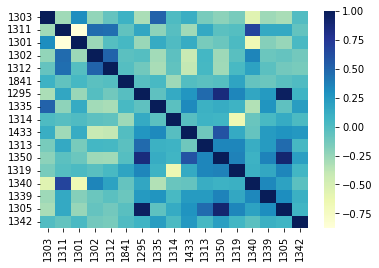

In [42]:
corr = df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap= "YlGnBu")

In [43]:
corr_df = corr.unstack().reset_index() # Unstack correlation matrix 
corr_df.columns = ['feature_1','feature_2', 'correlation']
corr_df.sort_values(by="correlation",ascending=False, inplace=True) # sort by correlation
corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']] # Remove self correlation
corr_df.head(5)

,feature_1,feature_2,correlation
261,1305,1295,0.964510
117,1295,1305,0.964510
202,1350,1305,0.898194
266,1305,1350,0.898194
113,1295,1350,0.859828


In [44]:
X_v2 = X.drop(columns=["1301", "1303", "1305", "1302"])

In [45]:
baseline_pipe_v2 = pipe

In [46]:
baseline_pipe_v2.fit(X_v2,y)

Pipeline(steps=[('num-transformer',
                 Pipeline(steps=[('numerical_impute', SimpleImputer()),
                                 ('scaler', RobustScaler())])),
                ('model', LinearRegression())])

In [83]:
baseline_pipe_v2.predict(X_v2)

array([10.38253023, 13.38119653, 16.2854675 , 12.45647267, 10.8190447 ,
       11.74649442,  7.96060739,  8.11328975, 10.12909059,  9.0169337 ,
        7.07548633,  7.15062469,  7.57726648,  8.43464176,  7.95716002,
       10.81278936, 11.67688742,  9.48549023, 10.27656974, 10.62401251,
       13.24661508, 11.58310645, 11.93228131, 10.00802102,  6.79553215,
        2.80191882,  8.41419345,  8.20701295,  7.91890134,  7.28222612,
       12.38839556, 12.79441941, 10.46587577,  7.95182036,  8.0357751 ,
        7.38703933,  8.09266503, 10.10516344,  6.93323534,  7.44320883,
        6.2615076 ,  6.18836113,  9.43980527, 12.35704154, 13.52114689,
        9.37585386,  9.91906866,  9.90927064,  8.13898138,  7.6697077 ,
        5.95652672,  6.42358862,  4.16577377,  4.03785294,  4.34831791,
        6.37643062,  4.35201875,  9.60091867,  8.29428672,  8.26253207,
        8.01142356, 12.18363552, 12.37920168, 11.49156239, 12.2684515 ,
        8.75925943,  9.74144399,  9.97142446, 10.67323268,  7.77

In [47]:
baseline_pipe_v2.score(X_v2,y)

0.6537742184589939

In [48]:
cross_val_score(baseline_pipe_v2, X_v2, y)

array([-1.22765561,  0.52222201,  0.34515976,  0.72820636,  0.54125619])

In [49]:
cross_val_score(baseline_pipe_v2, X_v2, y, cv=3, scoring='r2')

array([0.13209265, 0.24068657, 0.5888714 ])

# Function for trying models with a defined pipeline

In [14]:
def model_testing(pipe_line, X, y, cv=3, scoring="r2"):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    
    test_model = pipe_line
    test_model.fit(X_train, y_train)
    test_score = test_model.score(X_test, y_test)
    
    cross_val_results = cross_val_score(test_model, X_test, y_test, cv=cv, scoring=scoring)
    
    return print(f"Results: \nCross Validate Results: {cross_val_results} \nCross Validate Mean: {cross_val_results.mean()} \nModel Score: {test_score}")
    

In [50]:
model_testing(baseline_pipe_v2, X_v2, y)

Results: 
Cross Validate Results: [0.36301396 0.45377655 0.68036107] 
Cross Validate Mean: 0.49905052733694194 
Model Score: 0.43601101107971085


# Def pipe-grid search

##### /!\ Can overfit hyperparameters to the training set if too many combinations are tried out for too small a dataset

### Base Line KNN

In [ ]:
Baseline_KNN = KNeighborsRegressor(n_neighbors=1)
cv_results = cross_val_score(Baseline_KNN, X_train_scaled, y_train, cv=5)

In [ ]:
KNN_model = KNeighborsRegressor()

grid = {'n_neighbors': [1, 5, 10, 20, 50]}

search = GridSearchCV(KNeighborsRegressor, grid, 
                           scoring = 'r2',
                           cv = 3,
                           n_jobs=-1 # paralellize computation
                          ) 

# Fit data to Grid Search
search.fit(X_v2,y);